In [1]:
# Importing the libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import re
import os
sns.set()
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
warnings.filterwarnings("ignore")

In [2]:
# Reading the data

data = pd.read_csv('marketing_data.csv',index_col='ID', parse_dates=['Dt_Customer'])
data['ID'] = data.index
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,ID
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1826
1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,1
10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,10476
1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,1386
5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,10142
5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,5263
22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,22


In [3]:
# Getting the shape

print('Number of columns :',data.shape[1])
print('Number of records :',data.shape[0])

Number of columns : 28
Number of records : 2240


In [4]:
# Change "Income" column format from "$84,835.00" (String) to 84835.00 (Float) <br> By replacing comma(",") and "$" with empty string("").

data[' Income '].str.replace(r'[$,]','')
data[' Income ']=data[' Income '].str.replace(r'[$,]','')


In [5]:
# Changing the data type of income to a float value

data[' Income ']=pd.to_numeric(data[' Income '])
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,ID
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1826
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,1
10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,10476
1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,1386
5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,10142
5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,5263
22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,22


In [6]:
#Checking the data types of all columns

data.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
 Income                       float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain                        int64
Country     

In [7]:
# Create table for each type of data

category = data.select_dtypes(include='object')
numeric = data.select_dtypes(exclude='object')

In [8]:
# Categorical columns

category.dtypes

Education         object
Marital_Status    object
Country           object
dtype: object

In [9]:
# Numerical columns

numeric.dtypes

Year_Birth                      int64
 Income                       float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain                        int64
ID                              int64
dtype: object

# Null Values

In [10]:
# Null value check

n=pd.DataFrame(data.isnull().sum(), columns=['Null value count'])
n[n['Null value count']!=0]

,Null value count
Income,24


In [11]:
# Sometimes missing values are denoted as, for example, "Unknown" for categorical data, we need to check that

for f in category.columns:
    print(category[f].value_counts())
    print()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64



In [12]:
# Thus we can say that we have missing values in income column only

# Outliers

In [13]:
# Create report() function to describe and visualize the numerical data.

def report(feature):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(10,4)
    fig.suptitle(feature, fontsize=16)
    sns.histplot(data=numeric, x=feature, kde=True, ax=ax[0])
    sns.boxplot(data=numeric, x=feature, ax=ax[1])
    plt.show()

    print(numeric[feature].describe())

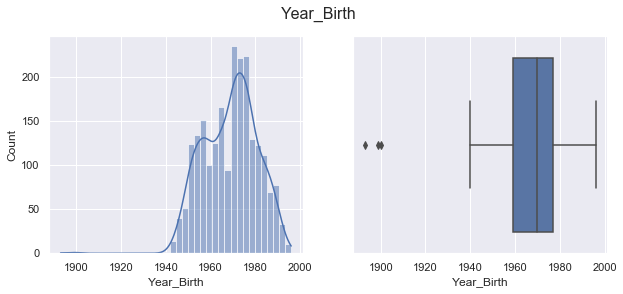

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


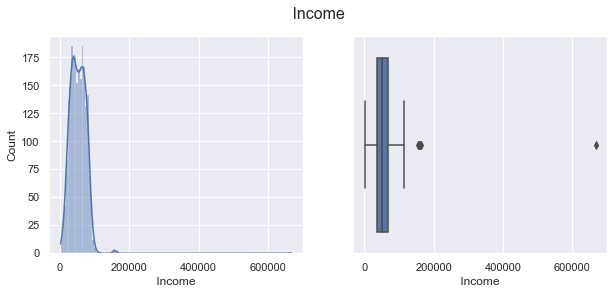

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name:  Income , dtype: float64


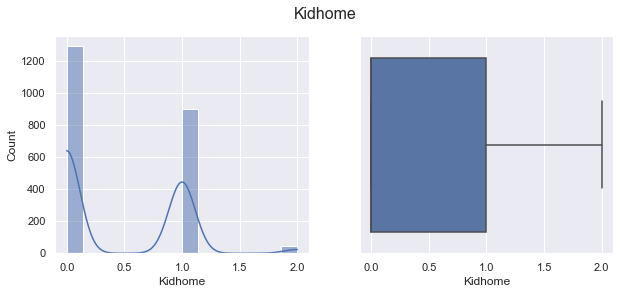

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64


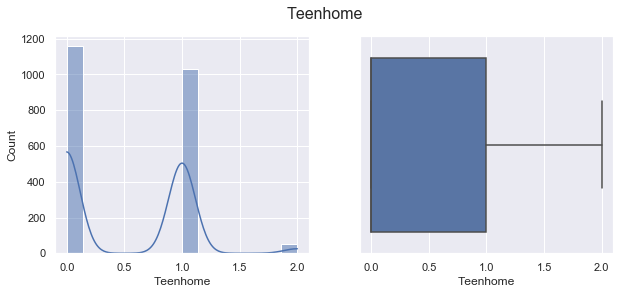

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64


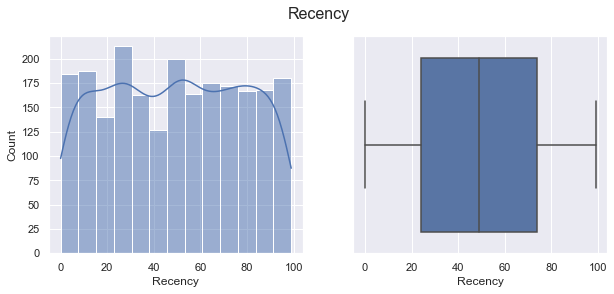

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


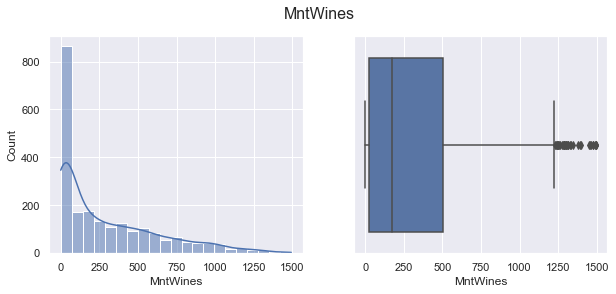

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64


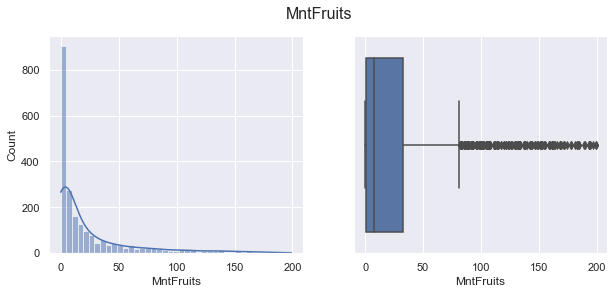

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64


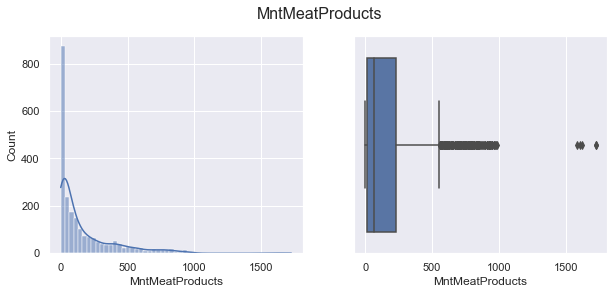

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


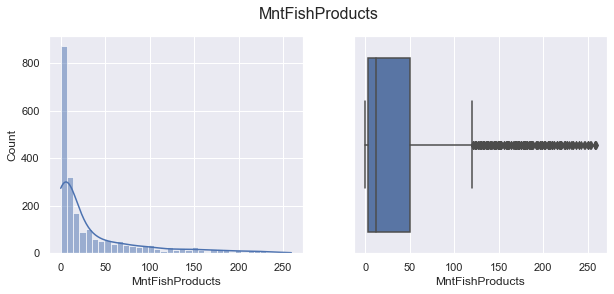

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64


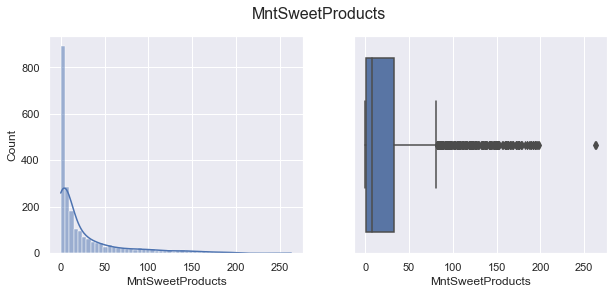

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64


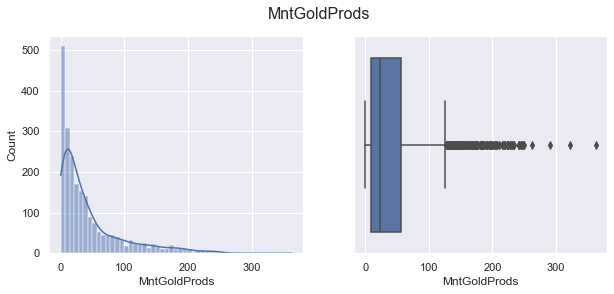

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64


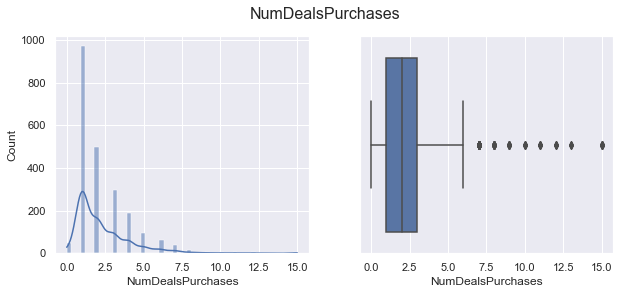

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


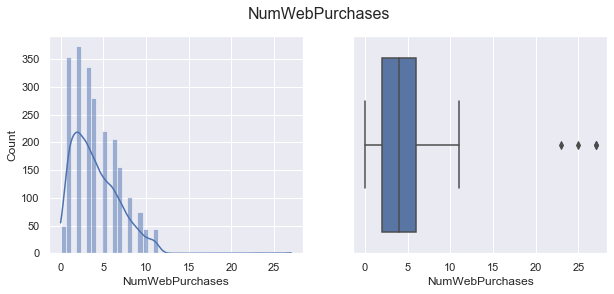

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


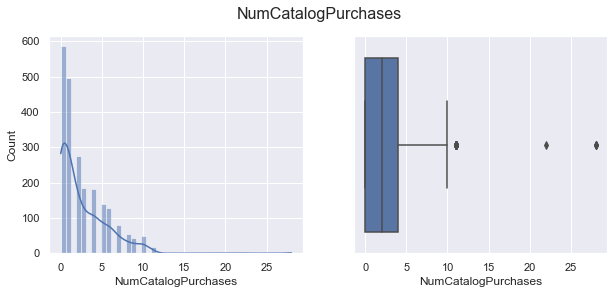

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


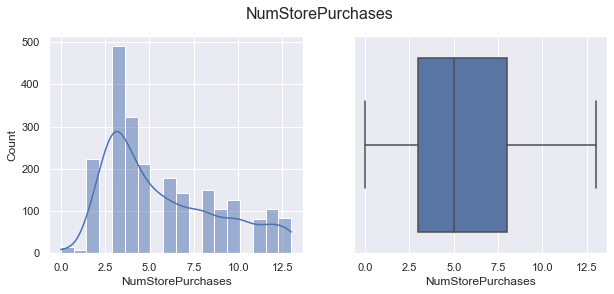

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


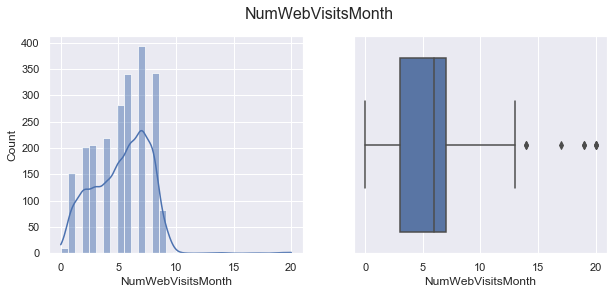

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64


In [47]:
for col in numeric.columns:
    if col in ['Dt_Customer']: continue
    if col == 'AcceptedCmp3' : break
    report(col)

In [14]:
# Three people were born on on before 1900 which seems unlikely, so they must be wrong entries

numeric[numeric['Year_Birth']<=1900]


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,ID
ID,,,,,,,,,,,,,,,,,,,,,,,,,
11004,1893,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,11004
1150,1899,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,1150
7829,1900,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,7829


In [15]:
# Coverting the values of year to null

z = numeric[numeric['Year_Birth']<=1900].index
numeric.loc[z, ["Year_Birth",'Dt_Customer' ]] = np.nan

In [16]:
# Income

numeric[numeric[' Income ']>160000]

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,ID
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1501,1982.0,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,1501
9432,1977.0,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,9432
1503,1976.0,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,1503


# Analysis

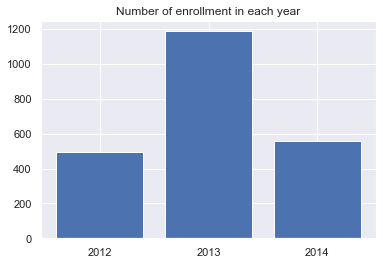

In [17]:
# We can see the total number of enrollment in each year in the following bar graph.

plt.bar(height = numeric['Dt_Customer'].dt.year.value_counts()[[2012,2013,2014]], x=['2012','2013','2014'])
plt.title('Number of enrollment in each year')
plt.show()

In [18]:
# No. of enrollments per year

numeric['Dt_Customer'].dt.year.value_counts()

2013.0    1187
2014.0     556
2012.0     494
Name: Dt_Customer, dtype: int64

In [ ]:
# Let's see why enrollments are comparitively higher in 2013

In [20]:
# We'll make a table based on years and months

y=pd.DataFrame(numeric['Dt_Customer'])
y['year']=numeric['Dt_Customer'].dt.year
y['month']=numeric['Dt_Customer'].dt.month
y.head()

,Dt_Customer,year,month
ID,,,
1826,2014-06-16,2014.0,6.0
1,2014-06-15,2014.0,6.0
10476,2014-05-13,2014.0,5.0
1386,2014-05-11,2014.0,5.0
5371,2014-04-08,2014.0,4.0


year
2012.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2013.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2014.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

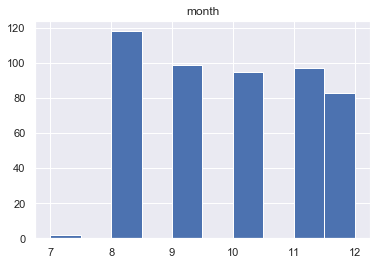

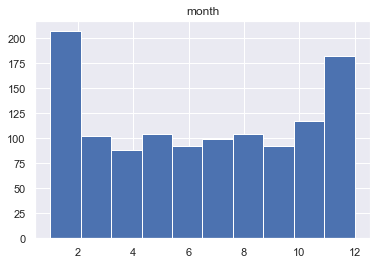

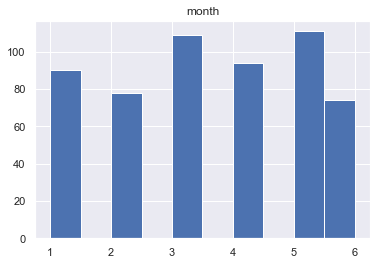

In [121]:
# Let's check enrollments per month in each year

o=y.groupby('year').hist()
o

In [21]:
# The data is gathered from 2012/08 and ,in 2014, data is gathered until 2014/07.
# Thus, that gives us the explanation that 2013 have the greatest number of enrollment

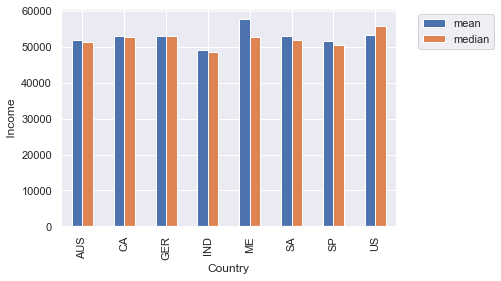

In [22]:
# Income
# Mean and Median of Income in each country

numeric_analysis = numeric[numeric[' Income ']!=666666] # Removing the outlier before caculating any statistics.

df = pd.pivot_table(numeric_analysis.join(category[['Country']]), 
                     values=' Income ', 
                     index='Country', 
                     aggfunc={' Income ':['mean','median']})
df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel(' Income ')
plt.show()

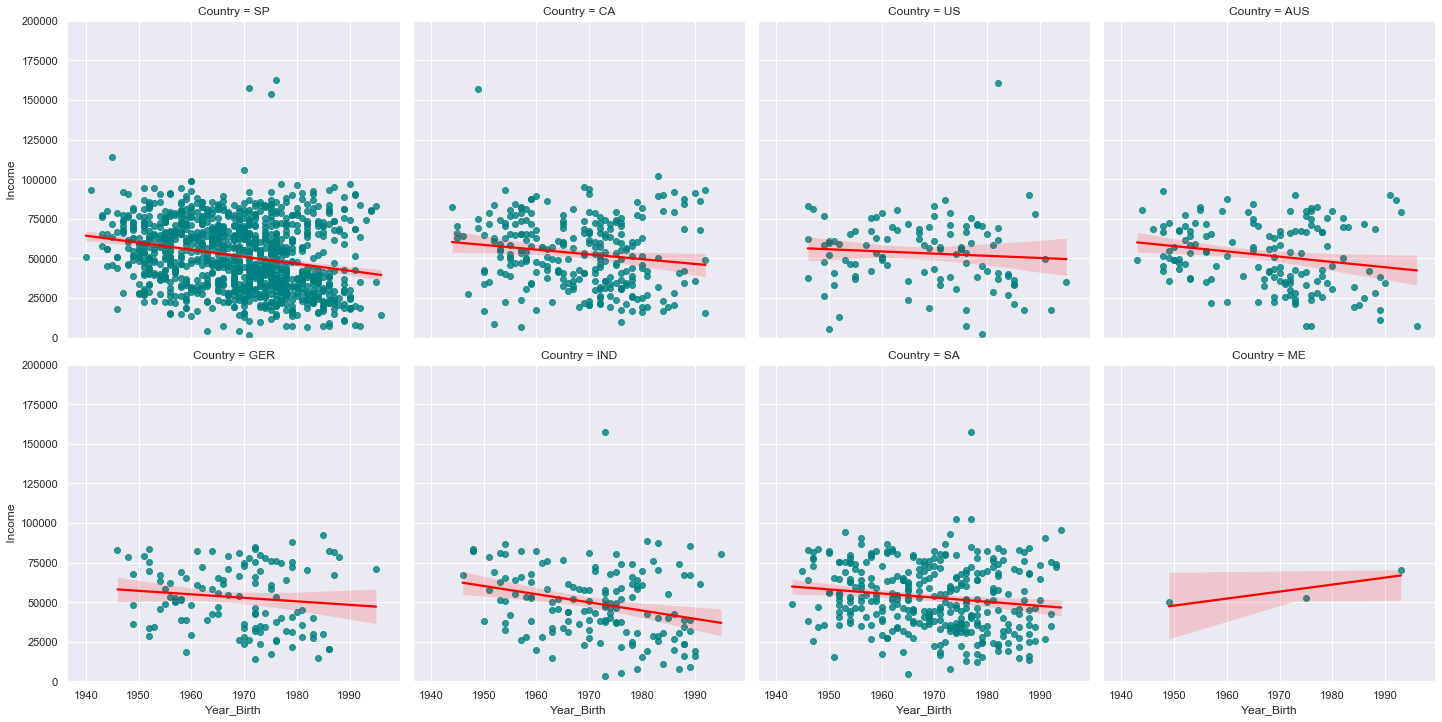

In [138]:
# Relationship between birth year and income, countrywise

t = numeric_analysis[[' Income ','Year_Birth']].join(category[['Country']])
sns.lmplot(data=t, y=' Income ', x='Year_Birth', col='Country', col_wrap=4, line_kws={'color': 'red'}, scatter_kws={'color':'teal'})
plt.ylim(0,200000)
plt.show()

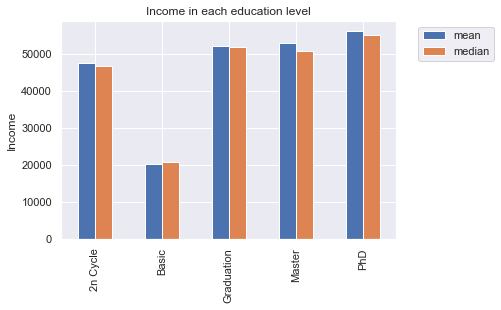

,count,mean,median
Education,,,
2n Cycle,200,47633.190000,46805.0
Basic,54,20306.259259,20744.0
Graduation,1115,52169.749776,51983.0
Master,365,52917.534247,50943.0
PhD,481,56145.313929,55212.0


In [23]:
# Income with respesct to education levels

df = pd.pivot_table(numeric_analysis.join(category[['Education']]), 
               values=' Income ', 
               index='Education', 
               aggfunc={' Income ':['count','mean','median']})

df[['mean','median']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Income')
plt.xlabel('')
plt.title('Income in each education level')
plt.show()

df

In [24]:
# Store product's information

Products = data.loc[:,'MntWines':'MntGoldProds']
Products

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
1826,189,104,379,111,189,218
1,464,5,64,7,0,37
10476,134,11,59,15,2,30
1386,10,0,1,0,0,0
5371,6,16,24,11,0,34
...,...,...,...,...,...,...
10142,372,18,126,47,48,78
5263,5,10,13,3,8,16
22,185,2,88,15,5,14


In [25]:
# Defining a total number of products purchased by each customer.

Products['Total_products_amount'] = np.sum(Products, axis=1)
Products

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_products_amount
ID,,,,,,,
1826,189,104,379,111,189,218,1190
1,464,5,64,7,0,37,577
10476,134,11,59,15,2,30,251
1386,10,0,1,0,0,0,11
5371,6,16,24,11,0,34,91
...,...,...,...,...,...,...,...
10142,372,18,126,47,48,78,689
5263,5,10,13,3,8,16,55
22,185,2,88,15,5,14,309


In [26]:
# Store Purchases' information

Purchases = data.loc[:,'NumDealsPurchases':'NumWebVisitsMonth'] 
Purchases

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,
1826,1,4,4,6,1
1,1,7,3,7,5
10476,1,3,2,5,2
1386,1,1,0,2,7
5371,2,3,1,2,7
...,...,...,...,...,...
10142,2,5,2,11,4
5263,1,1,0,3,8
22,2,6,1,5,8


In [27]:
# Now we,ll find out the no. of purchases in each category and their percentage share in total purchase

purchase_sum = np.sum(Purchases.iloc[:,:], axis=0)
print(purchase_sum)
print()
percent_each = purchase_sum/np.sum(purchase_sum)*100
print(percent_each)

NumDealsPurchases       5208
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
NumWebVisitsMonth      11909
dtype: int64

NumDealsPurchases      11.522124
NumWebPurchases        20.243363
NumCatalogPurchases    13.192478
NumStorePurchases      28.694690
NumWebVisitsMonth      26.347345
dtype: float64


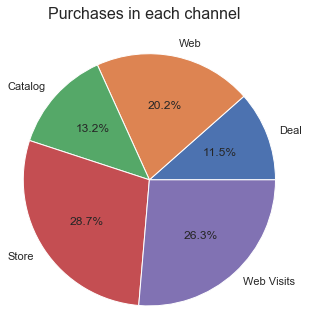

In [165]:
# Let's plot the results

fig, ax = plt.subplots()
fig.suptitle(t='Purchases in each channel', fontsize=16)
fig.set_size_inches(5,5)
ax.pie(percent_each, labels=['Deal','Web','Catalog','Store','Web Visits'], autopct='%1.1f%%')
ax.axis('equal')  
plt.show()

In [33]:
# Let's find out the total purchase

Purchases['Total_purchase'] = np.sum(Purchases, axis=1)
Purchases

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_purchase
ID,,,,,,
1826,1,4,4,6,1,48
1,1,7,3,7,5,69
10476,1,3,2,5,2,39
1386,1,1,0,2,7,33
5371,2,3,1,2,7,45
...,...,...,...,...,...,...
10142,2,5,2,11,4,72
5263,1,1,0,3,8,39
22,2,6,1,5,8,66


In [34]:
# To do analysis of purchase with respect to counteries, we need to join them with category data

Purchase_category = Purchases.join(category)
Purchase_category

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_purchase,Education,Marital_Status,Country
ID,,,,,,,,,
1826,1,4,4,6,1,48,Graduation,Divorced,SP
1,1,7,3,7,5,69,Graduation,Single,CA
10476,1,3,2,5,2,39,Graduation,Married,US
1386,1,1,0,2,7,33,Graduation,Together,AUS
5371,2,3,1,2,7,45,Graduation,Single,SP
...,...,...,...,...,...,...,...,...,...
10142,2,5,2,11,4,72,PhD,Divorced,US
5263,1,1,0,3,8,39,2n Cycle,Married,SP
22,2,6,1,5,8,66,Graduation,Divorced,SP


In [40]:
# Now we can find total number of purchases in each country.

Purchase_country_summary = pd.pivot_table(Purchase_category, 
                                          values='Total_purchase', 
                                          index='Country', aggfunc={'Total_purchase':['sum']}
                                          )
Purchase_country_summary

,sum
Country,
AUS,9423
CA,16554
GER,7227
IND,8739
ME,231
SA,20697
SP,65616
US,7113


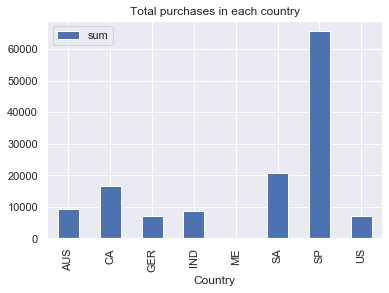

In [41]:
# Let's plot the results

Purchase_country_summary.plot(kind='bar')
plt.title('Total purchases in each country')
plt.show()

In [42]:
# We see that most of the customers are from Spain

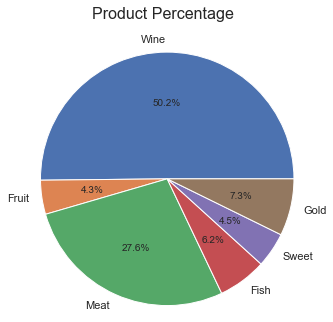

In [44]:
# We wanted to know which product was the most popular. 
# So, we'll look into Overall proportion of products purchased

sum_each_product = np.sum(Products, axis=0)
percent_product = sum_each_product/np.sum(sum_each_product)*100

fig, ax = plt.subplots()
fig.suptitle(t='Product Percentage', fontsize=16)
fig.set_size_inches(5,5)
ax.pie(percent_product[:6], labels=['Wine','Fruit','Meat','Fish','Sweet','Gold'], autopct='%1.1f%%')
ax.axis('equal')  
plt.show()

In [45]:
# We see that 50.2% of all products purchased by all customers is wine.
# And the second place(27.6%) is meat.

In [46]:
# Now let's check out the campaigns

Campaigns = data.loc[:,'AcceptedCmp3':'AcceptedCmp2']
Campaigns

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
ID,,,,,
1826,0,0,0,0,0
1,0,0,0,0,1
10476,0,0,0,0,0
1386,0,0,0,0,0
5371,1,0,0,0,0
...,...,...,...,...,...
10142,0,0,0,0,0
5263,0,0,0,0,0
22,0,0,0,0,0


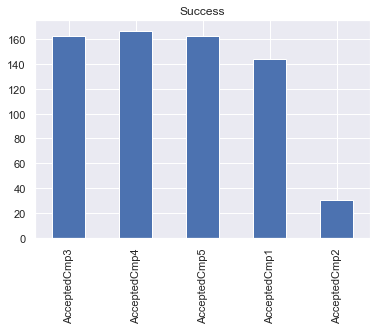

In [48]:
# Number of acceptance in each campaign

each_campaign = np.sum(Campaigns,axis=0)
each_campaign.plot(kind='bar')
plt.title('Success')
plt.show()

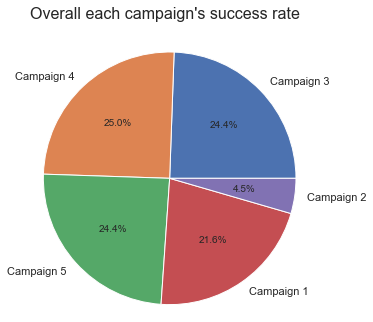

In [49]:
# Success rates in each campaign.

fig, ax = plt.subplots()
fig.suptitle(t='Overall each campaign\'s success rate', fontsize=16)
fig.set_size_inches(5,5)
ax.pie(each_campaign/np.sum(each_campaign)*100, labels=['Campaign 3','Campaign 4','Campaign 5','Campaign 1','Campaign 2'], autopct='%1.1f%%')
ax.axis('equal')  
plt.show()

In [50]:
# We see that campaign 2 might have some problems because it's very less accepted.
# While other campaigns are accepted at a similar rate.

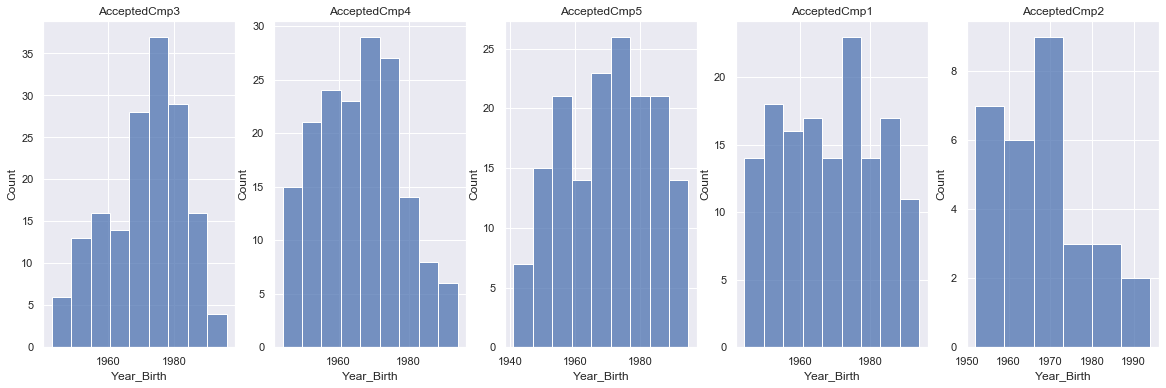

In [58]:
# Now, let's check if age has any effect on campaign acceptance

fig, ax = plt.subplots(1,len(Campaigns.columns))
i=0
fig.set_size_inches(20,6)
for campaign in Campaigns.columns:
    sns.histplot(data=numeric[numeric[campaign]==1], x = 'Year_Birth', ax=ax[i])
    ax[i].set_title(campaign)
    i+=1
plt.show()

In [59]:
# All the campaigns are declining as we go towards younger people.
# However campaign 5 and 1 are the most accepted ones if we consider younger population
# People born on 1960-1970 are accepting all kinds of campaigns.
# Campaign 1 has around uniform trend with respect to ages of people

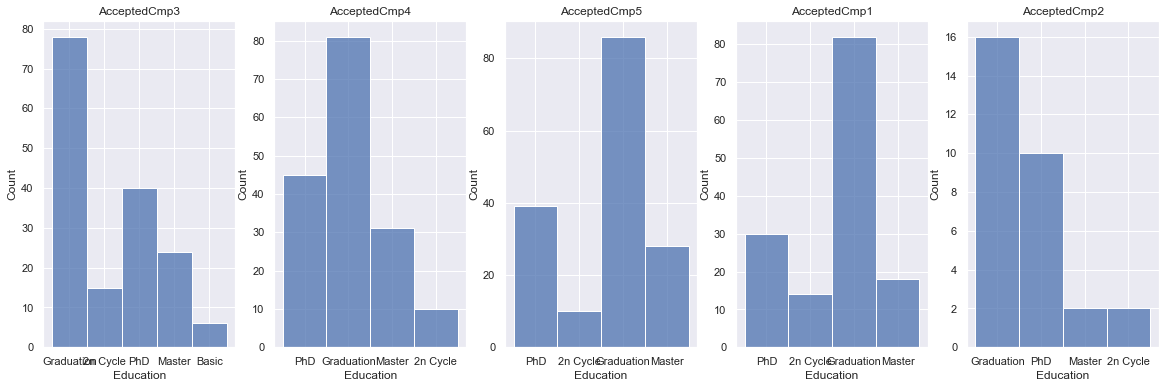

In [61]:
# Similarly let's see education's effect on campaign acceptance

fig, ax = plt.subplots(1,len(Campaigns.columns))
i=0
fig.set_size_inches(20,6)
for campaign in Campaigns.columns:
    sns.histplot(data=data[data[campaign]==1], x = 'Education', ax=ax[i])
    ax[i].set_title(campaign)
    i+=1
plt.show()

In [62]:
# People with basic education are only inclining towards campaign 3
# Rest all education levels are more or less same in accepting a particular campaign

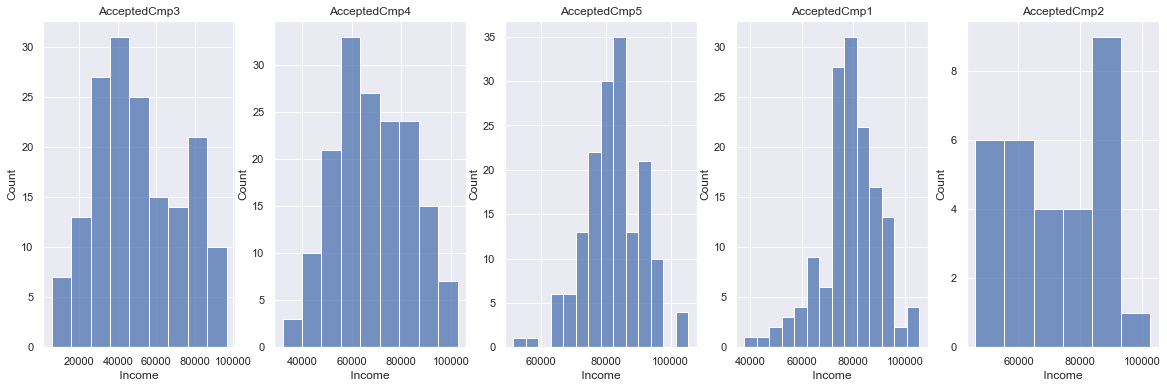

In [63]:
# Lastly, the effect of education on campaign acceptance

fig, ax = plt.subplots(1,len(Campaigns.columns))
i=0
fig.set_size_inches(20,6)
for campaign in Campaigns.columns:
    sns.histplot(data=data[data[campaign]==1], x = ' Income ', ax=ax[i])
    ax[i].set_title(campaign)
    i+=1
plt.show()

In [64]:
# We definately see a distiction in campaign acceptance on the basis of income here.
# People with income 30000-50000 are preferring campaign 3
# People with income 60000-70000 are preferring campaign 4
# People with income 70000-90000 are preferring campaign 1,2 and 5. Although people accepting campaign 2 are very less

In [66]:
# Next, we'll see if there's that effect in different countries. 

Campaigns_category = Campaigns.join(category)
Campaigns_category['Total accept'] = np.sum(Campaigns, axis=1)
summary_country = pd.pivot_table(Campaigns_category, 
                                   values='Total accept', 
                                   index='Country', 
                                   )

In [72]:
# The table below shows the overall average conversion in each country.

summary_country

,Total accept
Country,
AUS,0.218750
CA,0.324627
GER,0.316667
IND,0.263514
ME,0.333333
SA,0.255193
SP,0.324201
US,0.238532


In [73]:
# 'ME' has the best conversion rate but there is only 3 observation in this country. So, it's not significant.
# Other than 'ME', campaigns in 'SP' and 'CA' get the best mean conversion(32.4%).
# The worst rate is in 'AUS' which is 21.8%.

In [83]:
# Let's see the average performance of each campaign in each country.

x=Campaigns_category.groupby(by='Country').agg(['mean'])
x.style.background_gradient(sns.light_palette('green', as_cmap=True))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Total accept
,mean,mean,mean,mean,mean,mean
Country,,,,,,
AUS,0.05625,0.0375,0.08125,0.04375,0,0.21875
CA,0.0671642,0.0895522,0.0783582,0.0671642,0.0223881,0.324627
GER,0.0833333,0.0916667,0.0666667,0.0583333,0.0166667,0.316667
IND,0.0878378,0.0743243,0.0405405,0.0472973,0.0135135,0.263514
ME,0.333333,0,0,0,0,0.333333
SA,0.0623145,0.0593472,0.0623145,0.0593472,0.0118694,0.255193
SP,0.0757991,0.0812785,0.0812785,0.0712329,0.0146119,0.324201
US,0.0733945,0.0550459,0.0458716,0.0642202,0,0.238532


In [ ]:
# In campaign 3, "GER", "IND", "SP", "US" perform quite well.
# In campaign 4, "SP", "IND", "GER", "CA" perform quite well.
# In campaign 5, "AUS", "CA", "SP" perform quite well.
# In campaign 1, "SP", "CA" perform quite well.
# Campaign 2 was doing not very well in any country.
# For the overall average performance, "CA", "GER", "SP" are the best.